In [1]:
import pandas as pd
adni_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_training.csv")
habs_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_training.csv")
pointer_training=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\pointer_thickess_Dec_18_training.csv")
adni_training=adni_training.fillna('NA')
habs_training=habs_training.fillna('NA')
pointer_training=pointer_training.fillna('NA')
adni_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates.csv")

D:\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
D:\ANACONDA\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
#adni_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\dataset\\adni_testing_Sep24.csv")
adni_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\adni_thickness_Dec_17_testing.csv")
adni_testing=adni_testing.fillna('NA')
adni_baseline_filtered=adni_baseline[adni_baseline['RID'].isin(adni_testing['RID'])]
adni_baseline_final=adni_baseline_filtered.drop(columns=['PTADBEG',"APOE4_BIN","VISCODE","VISCODE2","VISDATE"])
adni_testing_filtered=adni_testing[adni_testing["CENTILOIDS"]!="NA"]
adni_testing_final=adni_testing_filtered.drop(columns=['abeta_SCANDATE',"tau_SCANDATE","VISCODE2","VISDATE","AMYLOID_STATUS","AMYLOID_STATUS_COMPOSITE_REF","ctx_entor/subcor","meta/subcor","Rate_of_Change","CTX_ENTORHINAL_SUVR","ERODED_SUBCORTICALWM_SUVR","abeta_Age","tau_Age","Rate_of_Change_meta","Rate_of_Change_ctx","Visit time tau","Rate_of_Change","Visit time mmse","Initial tau status meta","Initial tau status ctx","low_meta","intermediate_meta","high_meta","very_high_meta","low_ctx","intermediate_ctx","high_ctx","very_high_ctx","back_VISDATE", 
                                         "DX_EXAMDATE","GDS_VISDATE","Neuro_VISDATE","NPIQ_VISDATE","VS_VISDATE","EXAMDATE","AGE_BL","PTGENDER","PTEDUCAT","PTETHCAT","PTRACCAT","PTMARRY","APOE4","DX", 'META_TEMPORAL_SUVR','Rate_of_abeta_Change','Visit time mmse',"APOE4","DX","SUBJECT","SCANDATE","zscore_abeta","zscore_ptau","zscore_total_tau", "zscore_meta_tau","zscore_ctx_tau","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","Rate_of_Change_mPACCdigit_new","Visit time mPACCdigit","Rate_of_Change_MMSCORE_new"
])
adni_merged_testing = pd.merge(adni_testing_final, adni_baseline_final, on='RID', how='left')
diagnosis_map = {
    'CN': 'Cognitive normal',
    'MCI': 'Mildly cognitive impairment',
    'Unknown Diagnosis': 'NA',
    'Midly cognitive impairment': 'Mildly cognitive impairment',
}
adni_merged_testing['DIAGNOSIS'] = adni_merged_testing['DIAGNOSIS'].replace(diagnosis_map)
adni_merged_testing['ABETA40'] = pd.to_numeric(adni_merged_testing['ABETA40'], errors='coerce')
adni_merged_testing['ABETA42'] = pd.to_numeric(adni_merged_testing['ABETA42'], errors='coerce')
adni_merged_testing['TAU'] = pd.to_numeric(adni_merged_testing['TAU'], errors='coerce')
adni_merged_testing['PTAU'] = pd.to_numeric(adni_merged_testing['PTAU'], errors='coerce')
import numpy as np
adni_merged_testing= adni_merged_testing.replace(['Unknown', 'NA'], np.nan)


C:\Users\25110\AppData\Local\Temp/ipykernel_7648/2352857478.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adni_merged_testing= adni_merged_testing.replace(['Unknown', 'NA'], np.nan)


In [3]:
adni_training_filtered=adni_training[adni_training["CENTILOIDS"]!="NA"]

In [4]:
adni_training_final=adni_training_filtered.drop(columns=['abeta_SCANDATE',"tau_SCANDATE","VISCODE","VISCODE2","VISDATE","AMYLOID_STATUS","AMYLOID_STATUS_COMPOSITE_REF","ctx_entor/subcor","meta/subcor","Rate_of_Change","CTX_ENTORHINAL_SUVR","ERODED_SUBCORTICALWM_SUVR","abeta_Age","tau_Age","Rate_of_Change_meta","Rate_of_Change_ctx","Visit time tau","Rate_of_Change","Visit time mmse","Initial tau status meta","Initial tau status ctx","low_meta","intermediate_meta","high_meta","very_high_meta","low_ctx","intermediate_ctx","high_ctx","very_high_ctx","back_VISDATE", 
                                         "DX_EXAMDATE","GDS_VISDATE","Neuro_VISDATE","NPIQ_VISDATE","VS_VISDATE","EXAMDATE","AGE_BL","PTGENDER","PTEDUCAT","PTETHCAT","PTRACCAT","PTMARRY","APOE4","DX", 'META_TEMPORAL_SUVR','Rate_of_abeta_Change','Visit time mmse',"APOE4","DX","SUBJECT","SCANDATE","zscore_abeta","zscore_ptau","zscore_total_tau", "zscore_meta_tau","zscore_ctx_tau","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","Rate_of_Change_mPACCdigit_new","Visit time mPACCdigit","Rate_of_Change_MMSCORE_new"
])

In [5]:
adni_baseline_filtered=adni_baseline[adni_baseline['RID'].isin(adni_training['RID'])]
adni_baseline_final=adni_baseline_filtered.drop(columns=['PTADBEG',"APOE4_BIN","VISCODE","VISCODE2","VISDATE"])
adni_merged_df = pd.merge(adni_training_final, adni_baseline_final, on='RID', how='left')
diagnosis_map = {
    'CN': 'Cognitive normal',
    'MCI': 'Mildly cognitive impairment',
    'Unknown Diagnosis': 'NA',
    'Midly cognitive impairment': 'Mildly cognitive impairment',
}
adni_merged_df['DIAGNOSIS'] = adni_merged_df['DIAGNOSIS'].replace(diagnosis_map)
adni_merged_df['ABETA40'] = pd.to_numeric(adni_merged_df['ABETA40'], errors='coerce')
adni_merged_df['TAU'] = pd.to_numeric(adni_merged_df['TAU'], errors='coerce')
adni_merged_df['PTAU'] = pd.to_numeric(adni_merged_df['PTAU'], errors='coerce')
adni_merged_df['ABETA42'] = pd.to_numeric(adni_merged_df['ABETA42'], errors='coerce')

In [6]:
import numpy as np
adni_merged_df= adni_merged_df.replace(['Unknown', 'NA'], np.nan)

C:\Users\25110\AppData\Local\Temp/ipykernel_7648/254203607.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adni_merged_df= adni_merged_df.replace(['Unknown', 'NA'], np.nan)


In [8]:
adni_merged_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_merge_training.csv",index=False)
adni_merged_testing.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_merge_testing.csv",index=False)

In [7]:
import numpy as np
habs_training=habs_training[habs_training["nearest_ab_centiloid"]!="NA"]
habs_training.replace("NA", np.nan, inplace=True)

C:\Users\25110\AppData\Local\Temp/ipykernel_7648/3025997625.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_training.replace("NA", np.nan, inplace=True)


In [8]:
drop_group_habs=["Visit_ID", "SUBJECT","SCANDATE","APOE4","APOE2_carrier","ID_Gender","ID_MaritalStatus","Race","ID_Hispanic","ID_Education_HighSchool","ID_Education_Degree","ID_Retire","IMH_Alzheimers","IMH_AlzheimersAge","zscore_abeta","zscore_tau","zscore_total_tau","SUBJECT","TRACER","SCANDATE","MRIDATE","age_at_scan","META_TEMPORAL_SUVR","MMSE_closest_ab","MMSE","MMSE_closest_tau","DX_closest_ab","DX_closest_tau","BRAAK1_SUVR","ABETA","zscore_meta_tau","zscore_ctx_tau","zscore_blood_abeta","zscore_blood_tau","zscore_blood_ptau","01_BrainSegNotVent","zscore_LM2_A_Total_only_cog","zscore_SEVLT_DR_Total_only_cog","zscore_Digit_Symbol_Substitution_only_cog","zscore_MMSE_Total_only_cog","Rate_of_Change_PACC","Visit time PACC","Rate_of_Change_mmse","Visit time mmse","01_BrainSegNotVent"]
habs_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates_habs_smoking.csv")
habs_baseline_filtered=habs_baseline[habs_baseline['Med_ID'].isin(habs_training['Med_ID'])]
habs_baseline_final=habs_baseline_filtered.drop(columns=['ID_Education_HighSchool','ID_Education_Degree',"Smoke_Currently","Smoke_Ever"])
habs_training_final=habs_training.drop(columns=drop_group_habs)
habs_df = pd.merge(habs_training_final, habs_baseline_final, on='Med_ID', how='left')
habs_df = habs_df.replace(['Unknown', 'NA'], np.nan)


C:\Users\25110\AppData\Local\Temp/ipykernel_7648/3518647600.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_df = habs_df.replace(['Unknown', 'NA'], np.nan)


In [9]:
import numpy as np
#habs_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\dataset\\habs_testing_Sep24.csv")
habs_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\HABS-HD_thickness_Dec_17_testing.csv")
habs_testing=habs_testing.fillna('NA')
habs_testing=habs_testing[habs_testing["nearest_ab_centiloid"]!="NA"]
habs_testing.replace("NA", np.nan, inplace=True)



habs_baseline=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 8\\baseline_covariates_habs_smoking.csv")
habs_baseline_filtered=habs_baseline[habs_baseline['Med_ID'].isin(habs_testing['Med_ID'])]
habs_baseline_final=habs_baseline_filtered.drop(columns=['ID_Education_HighSchool','ID_Education_Degree',"Smoke_Currently","Smoke_Ever"])
habs_testing_final=habs_testing.drop(columns=drop_group_habs)
habs_testing_df = pd.merge(habs_testing_final, habs_baseline_final, on='Med_ID', how='left')
habs_testing_df = habs_testing_df.replace(['Unknown', 'NA'], np.nan)

C:\Users\25110\AppData\Local\Temp/ipykernel_7648/2184740459.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_testing.replace("NA", np.nan, inplace=True)
C:\Users\25110\AppData\Local\Temp/ipykernel_7648/2184740459.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  habs_testing_df = habs_testing_df.replace(['Unknown', 'NA'], np.nan)


In [12]:
habs_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_merge_training.csv",index=False)
habs_testing_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_merge_testing.csv",index=False)

In [10]:
drop_group_pointer=["Visit_ID","zscore_meta_tau","zscore_ctx_tau","MK6240_META_TEMPORAL_SUVR_1","MK6240_CTX_ENTORHINAL_SUVR_1","highbp130","bp_lowering_med","meds_for_diabetes","TICS_unadj","UCB_FRS","FHS_risk_s","g_cdr","DCTClassification"]

In [11]:
pointer_training=pointer_training[pointer_training["FBB_CENTILOIDS_1"]!="NA"]
pointer_training.replace("NA", np.nan, inplace=True)

pointer_training = pointer_training.replace(['Unknown', 'NA'], np.nan)
pointer_training=pointer_training.drop(columns=drop_group_pointer)

C:\Users\25110\AppData\Local\Temp/ipykernel_7648/901240905.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pointer_training.replace("NA", np.nan, inplace=True)


In [15]:
pointer_training.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_merge_training.csv",index=False)

In [12]:
pointer_testing=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\pointer_thickess_Dec_18_testing.csv")
pointer_testing=pointer_testing[pointer_testing["FBB_CENTILOIDS_1"]!="NA"]
pointer_testing.replace("NA", np.nan, inplace=True)
pointer_testing = pointer_testing.replace(['Unknown', 'NA'], np.nan)
pointer_testing=pointer_testing.drop(columns=drop_group_pointer)
pointer_testing.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_merge_testing.csv",index=False)

In [13]:
rename_name_adni = {
                "PTGENDER":"Gender",
                "PTEDUCAT":"Education",
                "PTETHCAT":"Ethnicity",
                "PTRACCAT":"Race",
                "PTMARRY":"Marrital status",
                "PTHAND":"Hand",
                "PTNOTRT":"Retired",     
                "PTDOBYY":"Date of birth year",
                "AGE_AD_ON_SET":"Age of AD on set",
                "APOE2_BIN":"APOE2",
                "APOE4_NUM":"APOE4",
                "Age":"Age",
                "Transformed_KEYMED":"Medication",
                'MMSCORE': 'Mini-Mental State Examination score',
                'GDTOTAL': 'Geriatric Depression Scale',
                'COPYSCOR': 'Clock Drawing Test score',
                'NPISCORE': 'Neuropsychiatric Inventory Total Score',
                'VSWEIGHT': 'Weight (in kg)',
                'VSHEIGHT': 'Height (in cm)',
                'VSBPSYS': 'Systolic blood pressure (mmHg)',
                'VSBPDIA': 'Diastolic blood pressure (mmHg)',
                'VSPULSE': 'Seated Pulse Rate (per minute)',
                'VSRESP': 'Respirations (per minute)',
                'VSTEMP': 'Temperature (in Celsius)',
                "ANARTERR": "American National Adult Reading Test Total Errors",
                "NPISCORE":"Neuropsychiatric Inventory Total Score",
                'FDG': 'average FDG-PET of angular, temporal, and posterior cingulate',
                "ABETA40":"Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)", 
                "ABETA42":"Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)", 
                "PTAU": "Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)",
                "TAU": "Tau protein concentration in Cerebrospinal Fluid (pg/mL)",
                'CDRSB': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                'ADAS11': "Alzheimer's Disease Assessment Scale (11 items)",
                'ADAS13': "Alzheimer's Disease Assessment Scale (13 items)",
                'ADASQ4': 'Question 4 score in the 11-item test',
                "RAVLT_immediate": "Rey Auditory Verbal Learning Test (Immediate)",
                "RAVLT_learning": "Rey Auditory Verbal Learning Test (Learning)",
                "RAVLT_forgetting": "Rey Auditory Verbal Learning Test (Forgetting)",
                "RAVLT_perc_forgetting": "Rey Auditory Verbal Learning Test (Percent forgetting)",
                "LDELTOTAL": "Delayed Total Recall test",
                "DIGITSCOR": "Digit Substitution test",
                "TRABSCOR": "Trail Making Test Part B Time",
                "FAQ":"Functional Assessment Questionnaire",
                "MOCA":"Montreal Cognitive Assessment",
                "mPACCdigit":"PACC score",
                "EcogSPMem":"Everyday Cognition test (self-reported Memory)",
                "EcogSPLang":"Everyday Cognition test (self-reported Language)",
                "EcogSPVisspat":"Everyday Cognition test (self-reported Visuospatial Abilities)",
                "EcogSPPlan":"Everyday Cognition test (self-reported Planning)",
                "EcogSPOrgan":"Everyday Cognition test (self-reported Organization)",
                "EcogSPDivatt":"Everyday Cognition test (self-reported Divided attention)",
                "EcogSPTotal":"Everyday Cognition test (self-reported Total scores)",
                "EcogPtMem":"Everyday Cognition test (partner-reported Memory)",
                "EcogPtLang":"Everyday Cognition test (partner-reported Language)",
                "EcogPtVisspat":"Everyday Cognition test (partner-reported Visuospatial Abilities)",
                "EcogPtPlan":"Everyday Cognition test (partner-reported Planning)",
                "EcogPtOrgan":"Everyday Cognition test (partner-reported Organization)",
                "EcogPtDivatt":"Everyday Cognition test (partner-reported Divided attention)",
                "EcogPtTotal":"Everyday Cognition test (partner-reported Total scores)",
                "DIAGNOSIS":"Diagnosis",
                "DXDEP": "Diagnosis of Depression",
                "DXPARK":"Diagnosis of Parkinson's disease",
                "vol_Left_Hippocampus":"Left_Hippocampus",
                "vol_Right_Hippocampus":"Right_Hippocampus",
             "vol_Left_Lateral_Ventricle":"Left_Lateral_Ventricle",
            "vol_Right_Lateral_Ventricle":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta",
                "ICV":"Total intracranial",
    "Thck_L_entorhinal": "Left_Entorhinal",
    "Thck_R_entorhinal":"Right_Entorhinal",
    "Thck_L_fusiform": "Left_Fusiform",
    "Thck_R_fusiform": "Right_Fusiform",
    "Thck_L_inferiorparietal": "Left Inferior Parietal",
    "Thck_R_inferiorparietal": "Right Inferior Parietal",
    "Thck_L_inferiortemporal": "Left Inferior Temporal",
    "Thck_R_inferiortemporal": "Right Inferior Temporal",
    "Thck_L_middletemporal": "Left Middle Temporal",
    "Thck_R_middletemporal": "Right Middle Temporal",
    "Thck_L_precuneus": "Left Precuneus",
    "Thck_R_precuneus": "Right Precuneus",
    "Thck_L_insula": "Left Insula",
    "Thck_R_insula": "Right Insula",
     'Right_meta':"Right_meta"  
}

In [14]:
rename_name_habs = {
                "Age":"Age",
                "ID_Gender":"Gender",
                "ID_MaritalStatus":"Marrital status",
                "Race":"Race",
                "Edu":"Education",
                "ID_Retire":"Retired",
                "ID_Hispanic":"Ethnicity",
                "APOE4":"APOE4",
                "APOE2_carrier":"APOE2",
                'MMSE_Total': 'Mini-Mental State Examination score',
                'GDS_Total': 'Geriatric Depression Scale',
                "AMNART_Er": "American National Adult Reading Test Total Errors",
                "DS_Total": "Digit Span total",
                "LM2_B_Total": "Logical Memory II Version B delayed recall",
                "LM2_A_Total": "Logical Memory II Version A delayed recall",
                'CDR_Sum': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                "CDX_Cog":"Diagnosis",
    "nearest_ab_centiloid":"CENTILOIDS",
                "r5_QTX_Plasma_Abeta40":"Amyloid beta 40 peptide in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_Abeta42":"Amyloid beta 42 peptide in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_pTau181":"Phosphorylated tau protein in the blood plasma(pg/mL)",
                "r5_QTX_Plasma_Total_Tau":"Tau protein concentration in the blood plasma(pg/mL)",
                "Digit_Symbol_Substitution": "Digit Substitution test",
                "TIV_VOLUME":"Total intracranial",
                "IMH_Depression": "Diagnosis of Depression",
                "AUDIT_Total":"Audit Total",
                "PACC_only_cog":"PACC score",
                "IMH_Cancer": "Diagnosis of Cancer",
                "IMH_Diabetes":"Diagnosis of diabetes",
                "IMH_HighBP":"Diagnosis of High Blood Pressure",
                "IMH_HighCholesterol":"Diagnosis of High Cholesterol",
                "IMH_HeartAttack":"Diagnosis of Heart Attack",
                "IMH_ThyroidDisease":"Diagnosis of Thyroid disease",
                "IMH_KidneyDisease":"Diagnosis of Kidney disease",
                "IMH_Stroke":"Diagnosis of Stroke",
                "IMH_Anxiety":"Diagnosis of Anxiety",
                "IMH_Osteoporosis":"Diagnosis of Osteoporosis",
                "IMH_Arthritis":"Diagnosis of Arthritis",
                "IMH_TBI":"Diagnosis of traumatic brain injury",
                "SMC_Total":"Subjective memory complaints total",
                "PED_Total":"Physician's Estimate of Duration total",
                "SEVLT_T1_Total":"SEVLT Trial 1 total",
                "SEVLT_T2_Total":"SEVLT Trial 2 total",
                "SEVLT_T3_Total":"SEVLT Trial 3 total",
                "SEVLT_T5_Total":"SEVLT Trial 5 total",
                "SEVLT_T1235_Total":"SEVLT Trials 1-5 total",
                "SEVLT_DR_Total":"SEVLT Trial Delayed Recall total score",
                "LM1_AB_Total":"Logical Memory I Version A and B delayed recall",
                "LM2_AB_Total":"Logical Memory II Version A and B delayed recall",
                "Smoke_Currently":"Smoking",
                "Smoke_Ever":"Smoking history",
                "FAS_Total": "Grand Total of FAS Word",
                "WAT_Correct":"WAT Number correct",
                "Animal_Total":"Animal Naming Total Score",
                "TOMM_Total":"Test of Memory Malingering",
                "BW_Glucose":"Blood Work Glucose (mg/dL)",
                "HI_Score":"Hachinski Ischemic Score",
  "LEFT_HIPPOCAMPUS_VOLUME":"Left_Hippocampus",
                "RIGHT_HIPPOCAMPUS_VOLUME":"Right_Hippocampus",
             "LEFT_LATERAL_VENTRICLE_VOLUME":"Left_Lateral_Ventricle",
            "RIGHT_LATERAL_VENTRICLE_VOLUME":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta", 
    "THCK:L_ENTORHINAL_VOLUME": "Left_Entorhinal",
    "THCK:R_ENTORHINAL_VOLUME":"Right_Entorhinal",
    "THCK:L_FUSIFORM_VOLUME": "Left_Fusiform",
    "THCK:R_FUSIFORM_VOLUME": "Right_Fusiform",
    "THCK:L_INFERIORPARIETAL_VOLUME": "Left Inferior Parietal",
    "THCK:R_INFERIORPARIETAL_VOLUME": "Right Inferior Parietal",
    "THCK:L_INFERIORTEMPORAL_VOLUME": "Left Inferior Temporal",
    "THCK:R_INFERIORTEMPORAL_VOLUME": "Right Inferior Temporal",
    "THCK:L_MIDDLETEMPORAL_VOLUME": "Left Middle Temporal",
    "THCK:R_MIDDLETEMPORAL_VOLUME": "Right Middle Temporal",
    "THCK:L_PRECUNEUS_VOLUME": "Left Precuneus",
    "THCK:R_PRECUNEUS_VOLUME": "Right Precuneus",
    "THCK:L_INSULA_VOLUME": "Left Insula",
    "THCK:R_INSULA_VOLUME": "Right Insula",
     'Right_meta':"Right_meta"  
            }

In [15]:
full_column_name_pointer={
                "age":"Age",
                "gender":"Gender",
                "race_simple":"Race",
                "raceEth":"Ethnicity",
                "APOE2_BIN":"APOE2",
                "APOE4_NUM":"APOE4",
                "Edu_yrs":"Education",
                "PersonOfColor":"Person of Color",
                "weightavg_kg": 'Weight (in kg)',
                "mindtotal":"MIND Diet Total Score",
                "PSQI_Global_Score":"Pittsburgh Sleep Quality Index Global Score",
                "ISI_score":"Insomnia Severity Index",
                "FHS_risk":"Framingham Heart Study 10 year CVD Risk",
                "bpavgsys": 'Systolic blood pressure (mmHg)',
                'bpavgdia': 'Diastolic blood pressure (mmHg)',
                'bmi':"Body Mass Index",
                "hba1c":"HbA1c(%)",
                "diabetes_type2":"Diagnosis of Type II diabetes",
                "diabetes_status":"Diagnosis of diabetes",
                "glucose":"Glucose level",
                "TICS_adj":"Adjusted TICS score",
                "CVD_bl":"Diagnosis of CVD",
                "smokerChar":"Smoke history",
                "animalstotcorrect":"Animal Naming Total Score",
                'mmsetotscore': 'Mini-Mental State Examination score',
                'delayrecalltot': 'Delayed Total Recall test',
                'cdr_scr_sum': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                "FCSRT_Free_Cued__96":"Free and Cued Selective Reminding Test",
                "episodic_score_z":"Episodic Memory Domain Score",
                "executive_score_z":"Executive Function Domain Score",
                "processing_score_z":"Processing Speed Domain Score",
                "global_composite_Z":"Global Composite Score (primary outcome)",
                "FINGER_NTB_z":"FINGER NTB Score",
                "PACC_5_z":"PACC-5 Score",
                "freq_cog":"Frequency/week of cognitive activities",
                "freq_social":"Frequency/week of social activities",
                "gds_total":"Geriatric Mood Scale",
                "chol":"Total Cholesterol (mg/dL)",
                "UCB_ADNIPOINTER_PACC":"PACC score",
                "CFI_ppt":"Cognitive Function Index (partner-reported)",
                "CFI_sp":"Cognitive Function Index (self-reported)",
                "DCTScore":"Clock Drawing Test score",
                "ecog_sp_memory":"Everyday Cognition test (self-reported Memory)",
                "ecog_sp_language":"Everyday Cognition test (self-reported Language)",
                "ecog_sp_visuosp":"Everyday Cognition test (self-reported Visuospatial Abilities)",
                "ecog_sp_planning":"Everyday Cognition test (self-reported Planning)",
                "ecog_sp_organize":"Everyday Cognition test (self-reported Organization)",
                "ecog_sp_attention":"Everyday Cognition test (self-reported Divided attention)",
                "ecog_sp_total":"Everyday Cognition test (self-reported Total scores)",
                "ecog_ppt_memory":"Everyday Cognition test (partner-reported Memory)",
                "ecog_ppt_language":"Everyday Cognition test (partner-reported Language)",
                "ecog_ppt_visuosp":"Everyday Cognition test (partner-reported Visuospatial Abilities)",
                "ecog_ppt_planning":"Everyday Cognition test (partner-reported Planning)",
                "ecog_ppt_organize":"Everyday Cognition test (partner-reported Organization)",
                "ecog_ppt_attention":"Everyday Cognition test (partner-reported Divided attention)",
                "ecog_ppt_total":"Everyday Cognition test (partner-reported Total scores)",
                "medName":"Medication",
                "heightavg_cm":"Height (in cm)",
                "phys_func_comp":"Short Survey Physical Functioning Scale",
                "phys_hlth_comp":"Short Survey Role Functioning/Physical Scale",
                "emot_prob_comp":"Short Survey Role Functioning/Emotional Scale",
                "ener_fati_comp":"Short Survey Energy/Fatigue Scale",
                "emot_well_comp":"Short Survey Emotional Well-being Scale",
                "soci_func_comp":"Short Survey Social Functioning Scale",
                "pain_comp":"Short Survey Pain Scale",
                "gen_hlth_comp":"Short Survey General Health Scale",
                "hlth_chg_comp":"Short Survey Health Change Scale",
                "tiv":"Total intracranial",
                "CDX_Cog":"Diagnosis",
     'bl_occupation':"Occupation",
 'bl_relationship':"Marrital status",
 'bl_retired':"Retired",
 'lowEdu':"Low Education",
    "FBB_CENTILOIDS_1":"CENTILOIDS",
           "vol_Left_Hippocampus":"Left_Hippocampus",
                "vol_Right_Hippocampus":"Right_Hippocampus",
             "vol_Left_Lateral_Ventricle":"Left_Lateral_Ventricle",
            "vol_Right_Lateral_Ventricle":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta",
    "Thck_L_entorhinal": "Left_Entorhinal",
    "Thck_R_entorhinal":"Right_Entorhinal",
    "Thck_L_fusiform": "Left_Fusiform",
    "Thck_R_fusiform": "Right_Fusiform",
    "Thck_L_inferiorparietal": "Left Inferior Parietal",
    "Thck_R_inferiorparietal": "Right Inferior Parietal",
    "Thck_L_inferiortemporal": "Left Inferior Temporal",
    "Thck_R_inferiortemporal": "Right Inferior Temporal",
    "Thck_L_middletemporal": "Left Middle Temporal",
    "Thck_R_middletemporal": "Right Middle Temporal",
    "Thck_L_precuneus": "Left Precuneus",
    "Thck_R_precuneus": "Right Precuneus",
    "Thck_L_insula": "Left Insula",
    "Thck_R_insula": "Right Insula",
     'Right_meta':"Right_meta"  
            }




In [16]:
A4_test=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\A4_thickness_Dec_17_validation.csv")

In [17]:
drop_group_a4=["AGEYR","APOEGN","FCFREET1","FCFREET2","FCFREET3","FCCUEDT1","FCCUEDT2","FCCUEDT3","LIMMTOTAL","SMOKE","ALCOHOL","CAFFEINE","SUBUSE","AEROBIC","WALKING","SLEEP","SLEEPDAY",
"PXHEADEY","PXCARD","PXPULM","PXABDOM","PXMUSCUL","PXEDEMA","PXSKIN","PXOTHER","NXGAIT","NXMOTOR","NXSENSOR","NXTREMOR","NXFINGER","NXHEEL","NXNERVE","NXOTHER",
"AGEYR","APOEGN","zscore_meta_tau","zscore_ctx_tau","braak1","meta","VISCODE"
]
A4_test=A4_test.fillna('NA')
A4_test=A4_test[A4_test["centiloid"]!="NA"]
A4_test=A4_test.drop(columns=drop_group_a4)
A4_test =A4_test.replace(['Unknown', 'NA'], np.nan)
A4_test["DIAGNOSIS"]="Cognitive normal"

C:\Users\25110\AppData\Local\Temp/ipykernel_7648/289698266.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  A4_test =A4_test.replace(['Unknown', 'NA'], np.nan)


In [18]:
rename_name_a4 = {
                "PTGENDER":"Gender",
                "PTEDUCAT":"Education",
                "PTETHNIC":"Ethnicity",
                "PTRACE":"Race",
                "PTMARRY":"Marrital status",
                "PTNOTRT":"Retired",     
                "APOE4":"APOE4",
                "PTAGE":"Age",
                'MMSCORE': 'Mini-Mental State Examination score',
                'VSWEIGHT': 'Weight (in kg)',
                'VSHEIGHT': 'Height (in cm)',
                'VSBPSYS': 'Systolic blood pressure (mmHg)',
                'VSBPDIA': 'Diastolic blood pressure (mmHg)',
                'VSPULSE': 'Seated Pulse Rate (per minute)',
                'VSRESP': 'Respirations (per minute)',
                'VSTEMP': 'Temperature (in Celsius)',
                'CDSOB': 'Clinical Dementia Rating Scale Sum of Boxes Scores',
                "LDELTOTAL": "Delayed Total Recall test",
                "DIGITTOTAL": "Digit Substitution test",
                "DIAGNOSIS":"Diagnosis",
                "tiv":"Total intracranial",
     "vol:Left-Hippocampus":"Left_Hippocampus",
                "vol:Right-Hippocampus":"Right_Hippocampus",
             "vol:Left-Lateral-Ventricle":"Left_Lateral_Ventricle",
            "vol:Right-Lateral-Ventricle":"Right_Lateral_Ventricle",
           "Left_meta":"Left_meta",
    "Thck:L_entorhinal": "Left_Entorhinal",
    "Thck:R_entorhinal":"Right_Entorhinal",
    "Thck:L_fusiform": "Left_Fusiform",
    "Thck:R_fusiform": "Right_Fusiform",
    "Thck:L_inferiorparietal": "Left Inferior Parietal",
    "Thck:R_inferiorparietal": "Right Inferior Parietal",
    "Thck:L_inferiortemporal": "Left Inferior Temporal",
    "Thck:R_inferiortemporal": "Right Inferior Temporal",
    "Thck:L_middletemporal": "Left Middle Temporal",
    "Thck:R_middletemporal": "Right Middle Temporal",
    "Thck:L_precuneus": "Left Precuneus",
    "Thck:R_precuneus": "Right Precuneus",
    "Thck:L_insula": "Left Insula",
    "Thck:R_insula": "Right Insula",
     'Right_meta':"Right_meta"  
   
}


A4_test = A4_test.rename(columns=rename_name_a4)

In [19]:
adni_merged_df = adni_merged_df.rename(columns=rename_name_adni)
habs_df = habs_df.rename(columns=rename_name_habs)
pointer_training = pointer_training.rename(columns=full_column_name_pointer)
adni_merged_testing = adni_merged_testing.rename(columns=rename_name_adni)
habs_testing_df=habs_testing_df.rename(columns=rename_name_habs)
pointer_testing =pointer_testing.rename(columns=full_column_name_pointer)

In [20]:
columns1 = set(adni_merged_df.columns)
columns2 = set(habs_df.columns)
columns3 = set(pointer_training.columns)
common_columns = columns1.union(columns2).union(columns3)
for col in common_columns:
    if col not in adni_merged_df.columns:
        adni_merged_df[col] = np.nan
    if col not in habs_df.columns:
        habs_df[col] = np.nan
    if col not in pointer_training.columns:
        pointer_training[col] = np.nan


In [21]:
combined_dataset = pd.concat([adni_merged_df, habs_df,pointer_training], axis=0)
#combined_dataset.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\Abeta_GB_combined_dataset_training.csv",index=False)

## Starting Training

In [22]:
combined_dataset=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\Abeta_GB_combined_dataset_training.csv")


C:\Users\25110\AppData\Local\Temp/ipykernel_7648/4152627655.py:1: DtypeWarning: Columns (6,77,111,116,119,146,151) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_dataset=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\Abeta_GB_combined_dataset_training.csv")


In [23]:
import pandas as pd

# Assuming combined_dataset is your DataFrame

# List of categorical columns (some may not exist in the dataset)
categorical_columns = ['Medication', 'Diagnosis', 'Diagnosis of Depression', 
                       'Diagnosis of Parkinson\'s disease', 
                       'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Hand', 
                       'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 
                       'Diagnosis of Cancer', 'Diagnosis of Stroke', 
                       'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 
                      'Smoke history', 'Person of Color', 
                       'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 
                       'Diagnosis of traumatic brain injury', 'Diagnosis of Type II diabetes', 
                       'Occupation', 'Diagnosis of Heart Attack', 'Diagnosis of CVD', 
                       'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']

# Filter only columns that exist in the dataset
existing_columns = [col for col in categorical_columns if col in combined_dataset.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")

# Use fillna directly on the subset of existing columns
combined_dataset.loc[:, existing_columns] = combined_dataset[existing_columns].fillna('unknown')

# Debugging step: Check if the changes were applied correctly
print(combined_dataset[existing_columns].head())


Existing categorical columns: ['Medication', 'Diagnosis', 'Diagnosis of Depression', "Diagnosis of Parkinson's disease", 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Hand', 'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 'Diagnosis of Cancer', 'Diagnosis of Stroke', 'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 'Smoke history', 'Person of Color', 'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 'Diagnosis of traumatic brain injury', 'Diagnosis of Type II diabetes', 'Occupation', 'Diagnosis of Heart Attack', 'Diagnosis of CVD', 'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']
                   Medication         Diagnosis Diagnosis of Depression  \
0                     unknown  Cognitive normal                 unknown   
1               no medication  Cognitive normal  No depressive symptoms   
2  Anti-depressant medication  Cognitive normal  No depressive symptoms   
3               no medication  Cognitive normal  No depre

In [24]:
combined_dataset[existing_columns].fillna('unknown')
combined_dataset.fillna(-9999, inplace=True)

In [25]:
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
bins = [-float('inf'),20.0, 40, 60.0, float('inf')]
labels = ['Negative', 'Weakly positive', 'Positive','Clearly positive']

combined_dataset['CENTILOIDS_CATEGORY'] = pd.cut(combined_dataset['CENTILOIDS'], bins=bins, labels=labels)

In [26]:
X = combined_dataset.drop(columns=['CENTILOIDS','CENTILOIDS_CATEGORY'], axis=1)
y = combined_dataset.CENTILOIDS_CATEGORY

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.9, random_state=42)


In [27]:
print(X.dtypes)

categorical_features_indices = np.where(X.dtypes != float)[0]

Mini-Mental State Examination score         float64
Age                                         float64
Medication                                   object
Diagnosis                                    object
Diagnosis of Depression                      object
                                             ...   
Executive Function Domain Score             float64
Audit Total                                 float64
Low Education                               float64
Smoking history                             float64
Global Composite Score (primary outcome)    float64
Length: 161, dtype: object


In [28]:
categorical_features_indices

array([  2,   3,   4,   5,  71,  73,  74,  75,  76,  77,  82, 101, 103,
       107, 108, 110, 115, 118, 126, 127, 131, 132, 140, 145, 147, 150,
       154], dtype=int64)

In [29]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
model_abeta = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    random_seed=10000,
    logging_level='Silent',
    iterations=200, 
    learning_rate=0.01
)

In [30]:
model_abeta.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [31]:
import matplotlib.pyplot as plt
# Calculate feature importance
feature_importances = model_abeta.get_feature_importance(type='FeatureImportance') 
# Plot feature importance

feature_names = model_abeta.feature_names_

# Create a DataFrame for easy handling
importance_df = pd.DataFrame({'Feature': feature_names, 'Abeta Importance': feature_importances})
importance_df.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\GB\\Feature_importance_abeta_gb.csv",index=False)

In [32]:
existing_columns = [col for col in categorical_columns if col in adni_merged_testing.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")

Existing categorical columns: ['Medication', 'Diagnosis', 'Diagnosis of Depression', "Diagnosis of Parkinson's disease", 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Hand', 'Retired']


In [33]:
adni_merged_testing_new = adni_merged_testing[existing_columns].astype(object)

In [41]:
adni_merged_testing_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(adni_merged_testing.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
adni_merged_testing_continuous  = adni_merged_testing[columns_not_in_existing].fillna(-9999)

# Concatenating row-wise (default axis=0)
combined_df_adni = pd.concat([adni_merged_testing_continuous, adni_merged_testing_new], axis=1)

combined_df_adni.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final.csv",index=False)

In [34]:
combined_df_adni=pd.read_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_final.csv")

In [72]:
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
bins = [-float('inf'),20.0, 40, 60.0, float('inf')]
labels = ['Negative', 'Weakly positive', 'Positive','Clearly positive']

# Create a new column with the mapped values
combined_df_adni['CENTILOIDS_CATEGORY'] = pd.cut(combined_df_adni['CENTILOIDS'], bins=bins, labels=labels)

In [73]:
X_adni= combined_df_adni.drop(columns=['CENTILOIDS','CENTILOIDS_CATEGORY',"RID"], axis=1)
y_adni = combined_df_adni.CENTILOIDS_CATEGORY

In [74]:
model_features = X.columns

In [75]:
for feature in model_features:
    if (feature not in  X_adni.columns) and (feature in categorical_columns) :
        X_adni[feature] = "unknown"
    elif (feature not in  X_adni.columns) and (feature not in categorical_columns) :
        X_adni[feature] = -9999

In [76]:
X_adni= X_adni[model_features ]

In [77]:
predictions = model_abeta.predict(X_adni)
predictions_probs = model_abeta.predict_proba(X_adni)

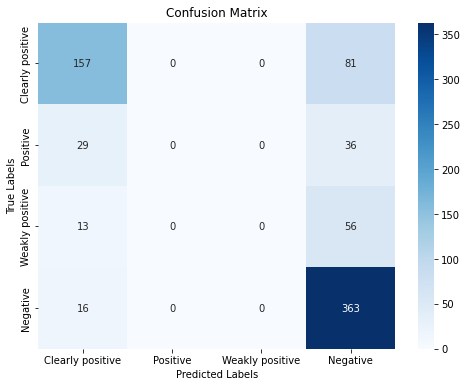

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_adni
y_pred =predictions



desired_order = ['Clearly positive', 'Positive', 'Weakly positive', 'Negative']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
189/306

0.6176470588235294

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Clearly positive vs Rest: 0.86395727881796
Class Negative vs Rest: 0.8735566147473545
Class Positive vs Rest: 0.6526575465350976
Class Weakly positive vs Rest: 0.6401249521866633
Overall One-vs-Rest AUC: 0.7575740980717689


In [43]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [44]:
weighted_auc

0.8299482710700172

In [45]:
accuracy_score(y_true,predictions)

0.6924101198402131

In [46]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.6924
Weighted Specificity: 0.7295


In [56]:
adni_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
adni_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result.csv",index=False)

## habs

In [47]:
habs_testing_df

,Med_ID,Age,Diagnosis of Depression,Mini-Mental State Examination score,Digit Span total,Digit Substitution test,Geriatric Depression Scale,American National Adult Reading Test Total Errors,Logical Memory II Version B delayed recall,Logical Memory II Version A delayed recall,...,Right_meta,Gender,Marrital status,Race,Ethnicity,Retired,Education,IMH_AlzheimersAge,APOE4,APOE2
0,4183,63,No depression,29,19.0,46.0,1.0,8.0,12,7,...,2.727,Male,Married,Black or African American,Not Hispanic or Latino,Not retired,16.0,NaN,NaN,NaN
1,4199,58,No depression,29,15.0,51.0,3.0,17.0,17,15,...,2.698,Female,Divorced,Black or African American,Not Hispanic or Latino,Not retired,16.0,NaN,NaN,NaN
2,4217,59,No depression,30,12.0,49.0,0.0,21.0,9,11,...,2.655,Male,Married,Black or African American,Not Hispanic or Latino,Not retired,14.0,NaN,NaN,NaN
3,4240,59,No depression,26,12.0,34.0,9.0,33.0,6,9,...,2.868,Female,Married,Black or African American,Not Hispanic or Latino,Not retired,14.0,NaN,NaN,NaN
4,4244,59,No depression,28,12.0,60.0,2.0,34.0,12,11,...,2.630,Male,Married,Black or African American,Not Hispanic or Latino,Not retired,12.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,9912,64,No depression,28,8.0,38.0,5.0,NaN,14,14,...,2.535,Female,Widowed,White,Hispanic or Latino,Not retired,12.0,NaN,NaN,NaN
438,9923,54,No depression,29,14.0,64.0,0.0,29.0,18,11,...,2.679,Female,Divorced,White,Hispanic or Latino,Not retired,12.0,NaN,NaN,NaN
439,9927,57,Depression,30,17.0,43.0,26.0,19.0,18,11,...,2.650,Female,Married,White,Hispanic or Latino,Not retired,9.0,NaN,NaN,NaN
440,9970,68,No depression,19,7.0,26.0,2.0,NaN,10,13,...,2.769,Female,Separated,White,Hispanic or Latino,Retired,3.0,NaN,NaN,NaN


In [48]:
existing_columns = [col for col in categorical_columns if col in habs_testing_df.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")

habs_testing_df_new= habs_testing_df[existing_columns].astype(object)
habs_testing_df_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(habs_testing_df.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
habs_testing_df_continuous  =habs_testing_df[columns_not_in_existing].fillna(-9999)

# Concatenating row-wise (default axis=0)
combined_df_habs = pd.concat([habs_testing_df_continuous, habs_testing_df_new], axis=1)

combined_df_habs.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_final.csv",index=False)

Existing categorical columns: ['Diagnosis', 'Diagnosis of Depression', 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Retired', 'Diagnosis of diabetes', 'Diagnosis of Osteoporosis', 'Diagnosis of Cancer', 'Diagnosis of Stroke', 'Diagnosis of Thyroid disease', 'Diagnosis of High Cholesterol', 'Diagnosis of Anxiety', 'Diagnosis of High Blood Pressure', 'Diagnosis of traumatic brain injury', 'Diagnosis of Heart Attack', 'Diagnosis of Kidney disease', 'Diagnosis of Arthritis']


In [49]:
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
bins = [-float('inf'),20.0, 40, 60.0, float('inf')]
labels = ['Negative', 'Weakly positive', 'Positive','Clearly positive']

# Create a new column with the mapped values
combined_df_habs['CENTILOIDS_CATEGORY'] = pd.cut(combined_df_habs['CENTILOIDS'], bins=bins, labels=labels)

In [50]:
X_habs= combined_df_habs.drop(columns=['CENTILOIDS','CENTILOIDS_CATEGORY',"Med_ID"], axis=1)
y_habs =combined_df_habs.CENTILOIDS_CATEGORY

In [51]:
y_habs.value_counts()

CENTILOIDS_CATEGORY
Negative            365
Clearly positive     34
Weakly positive      31
Positive             12
Name: count, dtype: int64

In [52]:
for feature in model_features:
    if (feature not in  X_habs.columns) and (feature in categorical_columns) :
        X_habs[feature] = "unknown"
    elif (feature not in  X_habs.columns) and (feature not in categorical_columns) :
        X_habs[feature] = -9999

In [53]:
X_habs= X_habs[model_features ]

In [54]:
predictions = model_abeta.predict(X_habs)
predictions_probs = model_abeta.predict_proba(X_habs)

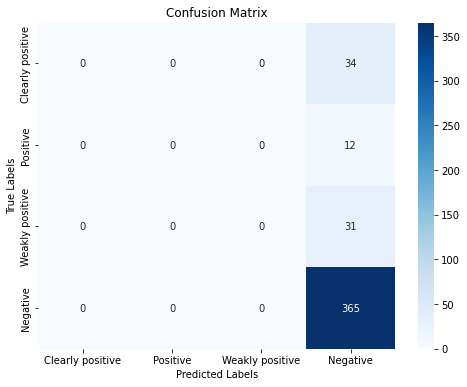

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_habs
y_pred =predictions



desired_order = ['Clearly positive', 'Positive', 'Weakly positive', 'Negative']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Clearly positive vs Rest: 0.7600922722029988
Class Negative vs Rest: 0.7539939512542252
Class Positive vs Rest: 0.6968992248062016
Class Weakly positive vs Rest: 0.6807942861627816
Overall One-vs-Rest AUC: 0.7229449336065518


In [58]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [59]:
weighted_auc

0.74777905663216

In [60]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.8258
Weighted Specificity: 0.1742


In [70]:
habs_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
habs_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result.csv",index=False)

In [61]:
existing_columns = [col for col in categorical_columns if col in pointer_testing.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")

Existing categorical columns: ['Medication', 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Retired', 'Diagnosis of diabetes', 'Smoke history', 'Person of Color', 'Diagnosis of Type II diabetes', 'Occupation', 'Diagnosis of CVD']


In [62]:
pointer_testing_new = pointer_testing[existing_columns].astype(object)

In [63]:
pointer_testing_new.fillna('unknown', inplace=True)

In [64]:
columns_not_in_existing = np.setdiff1d(pointer_testing.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
pointer_testing_continuous  =pointer_testing[columns_not_in_existing].fillna(-9999)


# Concatenating row-wise (default axis=0)
combined_df_pointer = pd.concat([pointer_testing_continuous, pointer_testing_new], axis=1)
#combined_df_pointer.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_final.csv",index=False)

In [65]:
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
bins = [-float('inf'),20.0, 40, 60.0, float('inf')]
labels = ['Negative', 'Weakly positive', 'Positive','Clearly positive']

# Create a new column with the mapped values
combined_df_pointer['CENTILOIDS_CATEGORY'] = pd.cut(combined_df_pointer['CENTILOIDS'], bins=bins, labels=labels)

In [91]:
combined_df_habs

,APOE2,APOE4,Age,American National Adult Reading Test Total Errors,Amyloid beta 40 peptide in the blood plasma(pg/mL),Amyloid beta 42 peptide in the blood plasma(pg/mL),Animal Naming Total Score,Audit Total,Blood Work Glucose (mg/dL),CENTILOIDS,...,Diagnosis of Stroke,Diagnosis of Thyroid disease,Diagnosis of High Cholesterol,Diagnosis of Anxiety,Diagnosis of High Blood Pressure,Diagnosis of traumatic brain injury,Diagnosis of Heart Attack,Diagnosis of Kidney disease,Diagnosis of Arthritis,CENTILOIDS_CATEGORY
0,-9999.0,-9999.0,63,8.0,141.78,4.52,31,3,111.0,8.0,...,No stroke,No thyroid disease,No high cholesterol,No anxiety,High blood pressure,No traumatic brain injury,No heart attack,No kidney disease,No arthritis,Negative
1,-9999.0,-9999.0,58,17.0,163.50,4.61,17,2,175.0,3.0,...,No stroke,No thyroid disease,No high cholesterol,No anxiety,No high blood pressure,No traumatic brain injury,No heart attack,No kidney disease,No arthritis,Negative
2,-9999.0,-9999.0,59,21.0,161.96,6.44,27,7,118.0,-1.0,...,No stroke,No thyroid disease,High cholesterol,No anxiety,High blood pressure,No traumatic brain injury,No heart attack,No kidney disease,No arthritis,Negative
3,-9999.0,-9999.0,59,33.0,220.74,8.59,20,0,-9999.0,-6.0,...,No stroke,No thyroid disease,High cholesterol,No anxiety,High blood pressure,No traumatic brain injury,No heart attack,Kidney Disease,Arthritis,Negative
4,-9999.0,-9999.0,59,34.0,171.67,7.43,22,0,87.0,-8.0,...,No stroke,No thyroid disease,No high cholesterol,No anxiety,High blood pressure,No traumatic brain injury,No heart attack,No kidney disease,No arthritis,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-9999.0,-9999.0,64,-9999.0,-9999.00,-9999.00,15,1,105.0,7.0,...,No stroke,Thyroid Disease,No high cholesterol,No anxiety,No high blood pressure,No traumatic brain injury,No heart attack,No kidney disease,Arthritis,Negative
438,-9999.0,-9999.0,54,29.0,-9999.00,-9999.00,21,1,107.0,-7.0,...,No stroke,Thyroid Disease,High cholesterol,No anxiety,High blood pressure,No traumatic brain injury,No heart attack,No kidney disease,No arthritis,Negative
439,-9999.0,-9999.0,57,19.0,-9999.00,-9999.00,18,1,123.0,2.0,...,No stroke,No thyroid disease,High cholesterol,Anxiety,High blood pressure,No traumatic brain injury,No heart attack,No kidney disease,No arthritis,Negative
440,-9999.0,-9999.0,68,-9999.0,-9999.00,-9999.00,12,0,155.0,51.0,...,No stroke,No thyroid disease,No high cholesterol,No anxiety,High blood pressure,No traumatic brain injury,No heart attack,No kidney disease,No arthritis,Positive


In [66]:
X_pointer=combined_df_pointer.drop(columns=['CENTILOIDS','CENTILOIDS_CATEGORY',"PID"], axis=1)
y_pointer =combined_df_pointer.CENTILOIDS_CATEGORY

In [67]:
for feature in model_features:
    if (feature not in  X_pointer.columns) and (feature in categorical_columns) :
        X_pointer[feature] = "unknown"
    elif (feature not in  X_pointer.columns) and (feature not in categorical_columns) :
        X_pointer[feature] = -9999

In [68]:
X_pointer= X_pointer[model_features ]

In [69]:
predictions = model_abeta.predict(X_pointer)
predictions_probs = model_abeta.predict_proba(X_pointer)

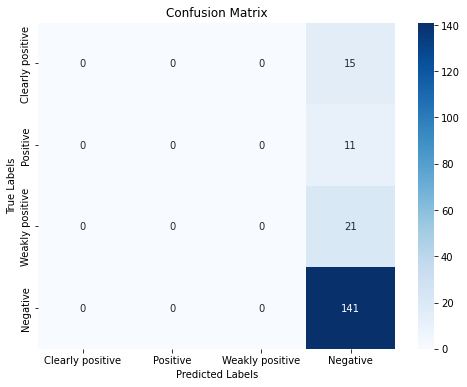

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_pointer
y_pred =predictions



desired_order = ['Clearly positive', 'Positive', 'Weakly positive', 'Negative']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [81]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.7500
Weighted Specificity: 0.2500


In [82]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Clearly positive vs Rest: 0.6851637764932563
Class Intermediate negative vs Rest: 0.5959509552323923
Class Negative vs Rest: 0.6720989889844575
Class Weakly positive vs Rest: 0.6702619414483821
Overall One-vs-Rest AUC: 0.655868915539622


In [83]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [84]:
weighted_auc

0.6645280080320203

In [85]:
pointer_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
pointer_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\POINTER\\GB\\pointer_testing_result.csv",index=False)

In [84]:
existing_columns = [col for col in categorical_columns if col in A4_test.columns]

# Debugging step: print the columns that exist in the dataset
print(f"Existing categorical columns: {existing_columns}")
A4_test_new= A4_test[existing_columns].astype(object)
A4_test_new.fillna('unknown', inplace=True)
columns_not_in_existing = np.setdiff1d(A4_test.columns, existing_columns)

# Modify the DataFrame by replacing NaN with 'Unknown' in the columns not in existing_columns
A4_test_continuous  =A4_test[columns_not_in_existing].fillna(-9999)

# Concatenating row-wise (default axis=0)
combined_df_A4 = pd.concat([A4_test_continuous, A4_test_new], axis=1)
combined_df_A4.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_final.csv",index=False)
import pandas as pd

# Assume merged_df is already defined from previous steps

# Define the bins and labels
bins = [-float('inf'),20.0, 40, 60.0, float('inf')]
labels = ['Negative', 'Weakly positive', 'Positive','Clearly positive']

# Create a new column with the mapped values
combined_df_A4 ['CENTILOIDS_CATEGORY'] = pd.cut(combined_df_A4 ['centiloid'], bins=bins, labels=labels)


Existing categorical columns: ['Diagnosis', 'Gender', 'Ethnicity', 'Race', 'Marrital status', 'Retired']


In [85]:
X_A4=combined_df_A4 .drop(columns=['centiloid','CENTILOIDS_CATEGORY',"BID"], axis=1)
y_A4 =combined_df_A4 .CENTILOIDS_CATEGORY

In [86]:
for feature in model_features:
    if (feature not in combined_df_A4 .columns) and (feature in categorical_columns) :
        X_A4 [feature] = "unknown"
    elif (feature not in  combined_df_A4 .columns) and (feature not in categorical_columns) :
        X_A4 [feature] = -9999

C:\Users\25110\AppData\Local\Temp/ipykernel_7648/2323672756.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_A4 [feature] = -9999
C:\Users\25110\AppData\Local\Temp/ipykernel_7648/2323672756.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_A4 [feature] = -9999
C:\Users\25110\AppData\Local\Temp/ipykernel_7648/2323672756.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

In [87]:
X_A4 = X_A4 [model_features ]

In [88]:
predictions = model_abeta.predict(X_A4 )
predictions_probs = model_abeta.predict_proba(X_A4 )

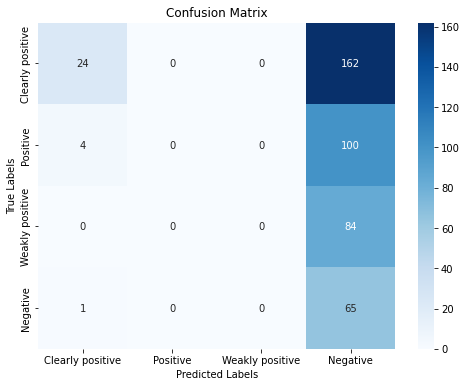

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_A4
y_pred =predictions



desired_order =  ['Clearly positive', 'Positive', 'Weakly positive', 'Negative']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [92]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.2045
Weighted Specificity: 0.8520


In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Clearly positive vs Rest: 0.7385276437219541
Class Intermediate negative vs Rest: 0.39462948100588546
Class Negative vs Rest: 0.7317290552584671
Class Weakly positive vs Rest: 0.47558951465201466
Overall One-vs-Rest AUC: 0.5851189236595803


In [94]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [95]:
weighted_auc

0.6097055575173776

In [96]:
A4_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
A4_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\A4\\GB\\A4_testing_result_abeta.csv",index=False)

In [97]:
model_abeta

## Incomplete

In [98]:

X_adni_subset=X_adni[(X_adni['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']!=-9999) | (X_adni["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]!=-9999) | (X_adni["Tau protein concentration in Cerebrospinal Fluid (pg/mL)"]!=-9999) |(X_adni["Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)"]!=-9999)]
y_adni_subset=y_adni[X_adni_subset.index]


In [99]:
X_adni_subset

,Mini-Mental State Examination score,Age,Medication,Diagnosis,Diagnosis of Depression,Diagnosis of Parkinson's disease,Geriatric Depression Scale,Clock Drawing Test score,American National Adult Reading Test Total Errors,Neuropsychiatric Inventory Total Score,...,Physician's Estimate of Duration total,Short Survey Pain Scale,Grand Total of FAS Word,Diagnosis of Anxiety,SEVLT Trial 5 total,Executive Function Domain Score,Audit Total,Low Education,Smoking history,Global Composite Score (primary outcome)
0,30.0,73.2,unknown,Cognitive normal,unknown,unknown,2.0,-9999.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999
1,26.0,80.2,Aricept | Anti-depressant medication,Mildly cognitive impairment,No depressive symptoms,No parkinsonism symptoms,1.0,5.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999
2,24.0,82.3,Aricept | Anti-depressant medication,Dementia,No depressive symptoms,No parkinsonism symptoms,4.0,5.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999
14,18.0,85.8,Namenda | Razadyne | Anti-depressant medicatio...,Dementia,No depressive symptoms,No parkinsonism symptoms,-9999.0,5.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999
16,28.0,90.0,no medication,Cognitive normal,No depressive symptoms,No parkinsonism symptoms,1.0,4.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,29.0,61.6,no medication,Cognitive normal,No depressive symptoms,No parkinsonism symptoms,1.0,-9999.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999
728,29.0,68.1,Anti-depressant medication | Other behavioral ...,Mildly cognitive impairment,No depressive symptoms,No parkinsonism symptoms,1.0,-9999.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999
730,25.0,71.8,Aricept,Mildly cognitive impairment,No depressive symptoms,No parkinsonism symptoms,0.0,-9999.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999
731,26.0,64.8,no medication,Cognitive normal,No depressive symptoms,No parkinsonism symptoms,1.0,-9999.0,-9999.0,-9999.0,...,-9999,-9999,-9999,unknown,-9999,-9999,-9999,-9999,-9999,-9999


In [100]:
predictions = model_abeta.predict(X_adni_subset)
predictions_probs = model_abeta.predict_proba(X_adni_subset)


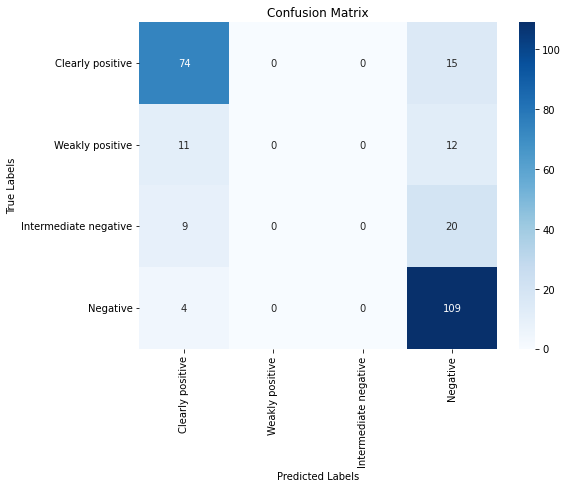

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_adni_subset
y_pred =predictions



desired_order = ['Clearly positive','Weakly positive','Intermediate negative','Negative']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [102]:
88/(88+24)

0.7857142857142857

In [103]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.7205
Weighted Specificity: 0.8007


In [104]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Clearly positive vs Rest: 0.9225059584610147
Class Intermediate negative vs Rest: 0.7069731800766282
Class Negative vs Rest: 0.9420071549614008
Class Weakly positive vs Rest: 0.6670431018257106
Overall One-vs-Rest AUC: 0.8096323488311886


In [105]:
weighted_auc = np.average(auc_list, weights=class_weights)

In [106]:
weighted_auc

0.8834411510940241

In [107]:
adni_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
adni_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_complete.csv",index=False)

In [108]:
X_adni_subset['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']=-9999
X_adni_subset["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]=-9999 
X_adni_subset["Tau protein concentration in Cerebrospinal Fluid (pg/mL)"]=-9999
X_adni_subset["Phosphorylated tau protein in Cerebrospinal Fluid (pg/mL)"]=-9999
y_adni_subset=y_adni[X_adni_subset.index]

C:\Users\25110\AppData\Local\Temp/ipykernel_5900/2873835460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_adni_subset['Amyloid beta 40 in Cerebrospinal Fluid (pg/mL)']=-9999
C:\Users\25110\AppData\Local\Temp/ipykernel_5900/2873835460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_adni_subset["Amyloid beta 42 in Cerebrospinal Fluid (pg/mL)"]=-9999
C:\Users\25110\AppData\Local\Temp/ipykernel_5900/2873835460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [109]:
predictions = model_abeta.predict(X_adni_subset)
predictions_probs = model_abeta.predict_proba(X_adni_subset)


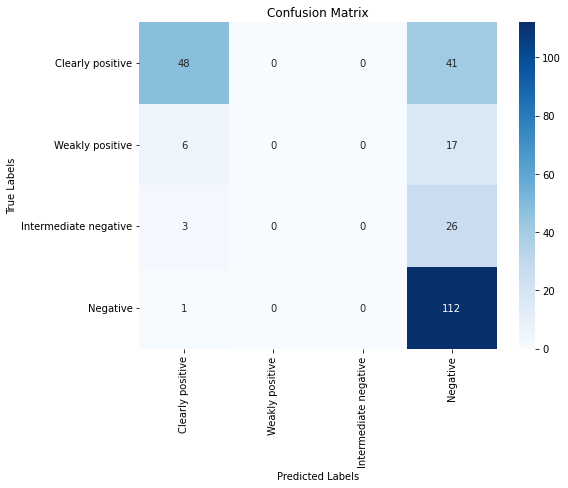

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_adni_subset
y_pred =predictions



desired_order = ['Clearly positive','Weakly positive','Intermediate negative','Negative']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [111]:
(48+7)/(48+7+41+16)

0.49107142857142855

In [112]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.6299
Weighted Specificity: 0.7137


In [113]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Clearly positive vs Rest: 0.8627851549199864
Class Intermediate negative vs Rest: 0.6226819923371647
Class Negative vs Rest: 0.8348082595870207
Class Weakly positive vs Rest: 0.5526068134763786
Overall One-vs-Rest AUC: 0.7182205550801376


In [114]:
weighted_auc = np.average(auc_list, weights=class_weights)
weighted_auc

0.7948383724761677

In [115]:
adni_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
adni_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\ADNI\\GB\\adni_testing_result_incomplete.csv",index=False)

## Incomplete HABS-HD

In [116]:


X_habs_subset=X_habs[(X_habs['Amyloid beta 40 peptide in the blood plasma(pg/mL)']>0) | (X_habs["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]>0) | (X_habs["Tau protein concentration in the blood plasma(pg/mL)"]>0) |(X_habs["Phosphorylated tau protein in the blood plasma(pg/mL)"]>0)]
y_habs_subset=y_habs[X_habs_subset.index]


In [117]:
predictions = model_abeta.predict(X_habs_subset)
predictions_probs = model_abeta.predict_proba(X_habs_subset)


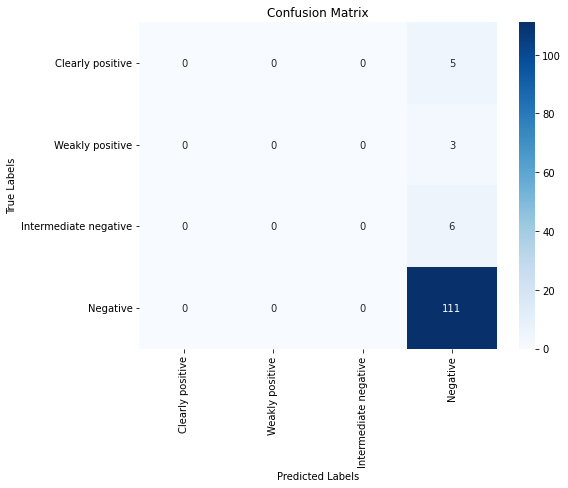

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_habs_subset
y_pred =predictions



desired_order = ['Clearly positive','Weakly positive','Intermediate negative','Negative']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [119]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.8880
Weighted Specificity: 0.1120


In [120]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Clearly positive vs Rest: 0.8416666666666667
Class Intermediate negative vs Rest: 0.7521008403361344
Class Negative vs Rest: 0.8030888030888031
Class Weakly positive vs Rest: 0.5491803278688525
Overall One-vs-Rest AUC: 0.7365091594901143


In [121]:
weighted_auc = np.average(auc_list, weights=class_weights)
weighted_auc

0.7960906920145109

In [122]:
habs_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
habs_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_complete.csv",index=False)

In [123]:
X_habs_subset['Amyloid beta 40 peptide in the blood plasma(pg/mL)']=-9999
X_habs_subset["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]=-9999 
X_habs_subset["Tau protein concentration in the blood plasma(pg/mL)"]=-9999
X_habs_subset["Phosphorylated tau protein in the blood plasma(pg/mL)"]=-9999


C:\Users\25110\AppData\Local\Temp/ipykernel_5900/3728062156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_habs_subset['Amyloid beta 40 peptide in the blood plasma(pg/mL)']=-9999
C:\Users\25110\AppData\Local\Temp/ipykernel_5900/3728062156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_habs_subset["Amyloid beta 42 peptide in the blood plasma(pg/mL)"]=-9999
C:\Users\25110\AppData\Local\Temp/ipykernel_5900/3728062156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [124]:
predictions = model_abeta.predict(X_habs_subset)
predictions_probs = model_abeta.predict_proba(X_habs_subset)


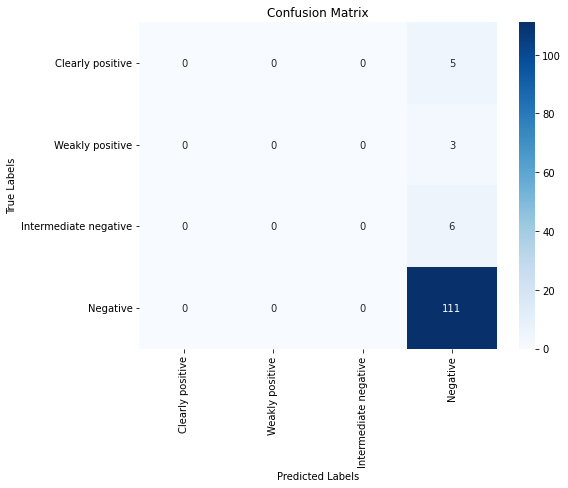

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example true labels and predictions
y_true = y_habs_subset
y_pred =predictions



desired_order = ['Clearly positive','Weakly positive','Intermediate negative','Negative']
# Filter out 'Unknown' class from both true and predicted labels


# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=desired_order)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=desired_order, yticklabels=desired_order)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [126]:
# 初始化敏感性和特异性的列表
sensitivities = []
specificities = []
class_weights = []

# 遍历每个类别计算敏感性和特异性
for i in range(len(cm)):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    
    # 权重为该类别的真实样本数
    class_weights.append(TP + FN)

# 计算加权平均敏感性和特异性
weighted_sensitivity = np.average(sensitivities, weights=class_weights)
weighted_specificity = np.average(specificities, weights=class_weights)

print(f"Weighted Sensitivity: {weighted_sensitivity:.4f}")
print(f"Weighted Specificity: {weighted_specificity:.4f}")

Weighted Sensitivity: 0.8880
Weighted Specificity: 0.1120


In [127]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

# Binarize the output
one_hot_encoder = OneHotEncoder()
y_true_binarized = one_hot_encoder.fit_transform(y_true_encoded.reshape(-1, 1)).toarray()
class_weights = []
auc_list=[]
# Compute AUC for the one-vs-rest (ovr) method for all classes
ovr_aucs = {}
for i in range(y_true_binarized.shape[1]):
    auc = roc_auc_score(list(np.array(y_true_binarized)[:, i]), list(np.array(predictions_probs)[:, i]))
    ovr_aucs[f"Class {label_encoder.classes_[i]} vs Rest"] = auc
    auc_list.append(auc)
    class_weights.append(np.sum(y_true == label_encoder.classes_[i]))
print("One-vs-Rest AUC for each class:")
for class_label, auc in ovr_aucs.items():
    print(f"{class_label}: {auc}")

# Overall One-vs-Rest AUC
overall_ovr_auc = roc_auc_score(y_true_binarized,predictions_probs, multi_class='ovr')
print(f"Overall One-vs-Rest AUC: {overall_ovr_auc}")

One-vs-Rest AUC for each class:
Class Clearly positive vs Rest: 0.8416666666666667
Class Intermediate negative vs Rest: 0.7549019607843137
Class Negative vs Rest: 0.8024453024453024
Class Weakly positive vs Rest: 0.5491803278688525
Overall One-vs-Rest AUC: 0.7370485644412839


In [128]:
weighted_auc = np.average(auc_list, weights=class_weights)
weighted_auc

0.7956537172245948

In [129]:
habs_prediction=pd.DataFrame({"Truth":list(y_true),"Prediction":list(predictions),"Clearly positive": list(np.array(predictions_probs)[:, 0]),"Intermediate Negative": list(np.array(predictions_probs)[:, 1]),"Negative": list(np.array(predictions_probs)[:, 2]),"Weakly positive": list(np.array(predictions_probs)[:, 3])})
habs_prediction.to_csv("D:\\Research\\AD\\ADLLM\\ADNI process 9\\HABS-HD\\GB\\habs_testing_result_incomplete.csv",index=False)